In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
np.random.seed(0)
p=0.5
bernoulli = stats.bernoulli(p)
# Since we use np.random.seed(0), the following will always return the same thing
bernoulli.rvs(10)

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [3]:
def distribution0_jam():
    return stats.norm.rvs(loc=25,scale=11)
def distribution0_normal():
    return stats.norm.rvs(loc=70,scale=20)

In [4]:
def distribution0():
    """Distribution 0."""
#     p=0.5
#     bernoulli = stats.bernoulli(p)
    if bernoulli.rvs():
        return distribution0_jam(), 'slow'
    else:
        return distribution0_normal(), 'normal'

In [5]:
def distribution1_jam():
    """Distribution of slow traffic."""
#     p=0.5
#     bernoulli = stats.bernoulli(p)
    if bernoulli.rvs():
        return stats.norm.rvs(loc=20,scale=8)
    else:
        return stats.norm.rvs(loc=60,scale=8)

In [6]:
def distribution1_normal():
    """Distribution of normal traffic."""
#     p=0.5
#     bernoulli = stats.bernoulli(p)
    if bernoulli.rvs():
        return stats.norm.rvs(loc=40,scale=8)
    else:
        return stats.norm.rvs(loc=80,scale=8)

In [7]:
def distribution1():
    """Distribution 1."""
#     p=0.5
#     bernoulli = stats.bernoulli(p)
    if bernoulli.rvs():
        return distribution1_jam(), 'slow'
    else:
        return distribution1_normal(),'normal'

In [8]:
def sample(distribution,n):
    samples= [distribution() for i in range(n)]
    df = pd.DataFrame(samples,columns=['coordinates','traffic'])
    return df

In [9]:
def plot_traffic(data,size_point=4):
    sns.set_context("talk",font_scale=3)
    palette = sns.color_palette("Set1")
    plt.figure(figsize=(20,13))
    ax=sns.swarmplot(x='coordinates',y='traffic',data=data,size=size_point,palette=palette)
    ax.yaxis.set_label_coords(1.05, 0.5)
    ax.set_xlim(0,100)
    ax.set_ylabel('')
    sns.despine(bottom=True,right=False)
    return None

In [10]:
def plot_sample(distribution,n,size_point=4):
    data = sample(distribution,n)
    plot_traffic(data,size_point=4)
    return None

In [9]:
def plot_sample(distribution,n,size_point=4):
    data = sample(distribution,n)
    sns.set_context("talk",font_scale=3)
    palette = sns.color_palette("Set1")
    plt.figure(figsize=(20,13))
    ax=sns.swarmplot(x='coordinates',y='traffic',data=data,size=size_point,palette=palette)
    ax.yaxis.set_label_coords(1.05, 0.5)
    ax.set_xlim(0,100)
    ax.set_ylabel('')
    sns.despine(bottom=True,right=False)
    return None

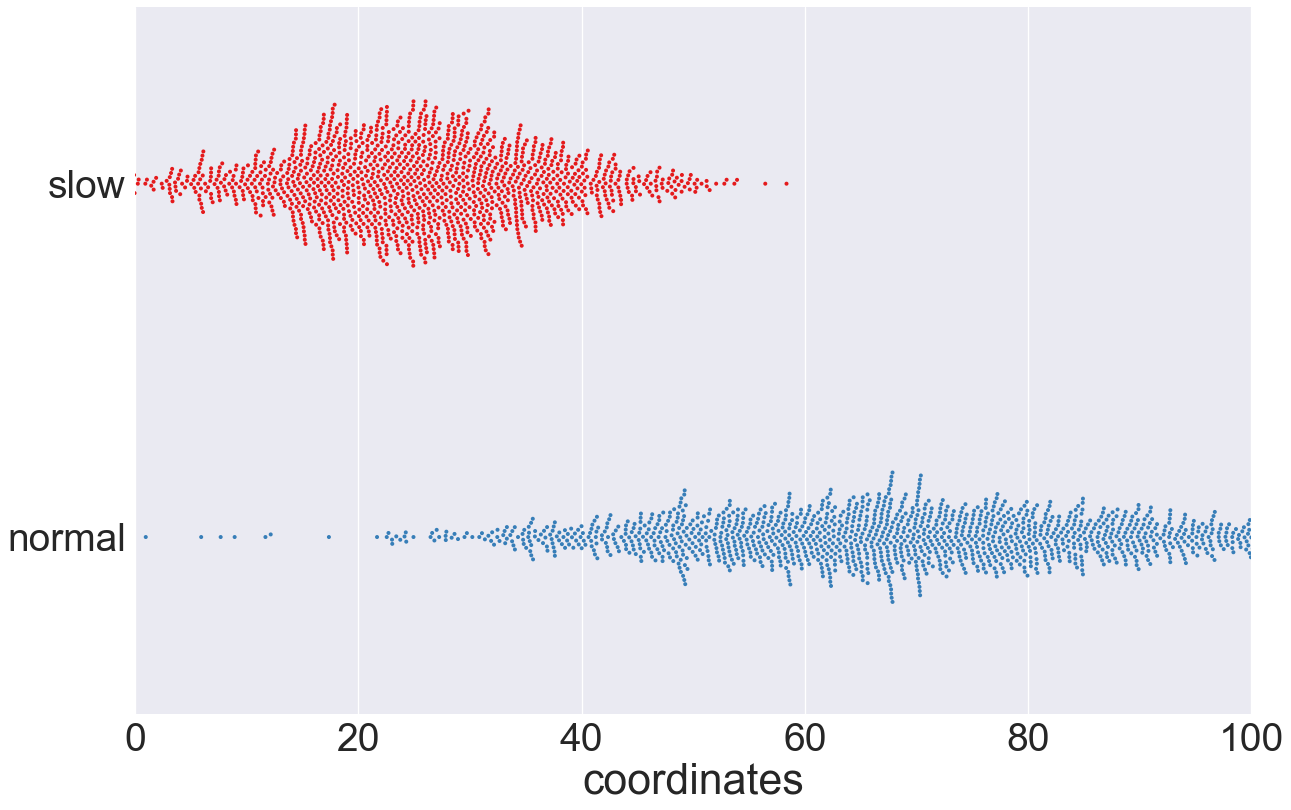

In [11]:
plot_sample(distribution0,3000,size_point=5)

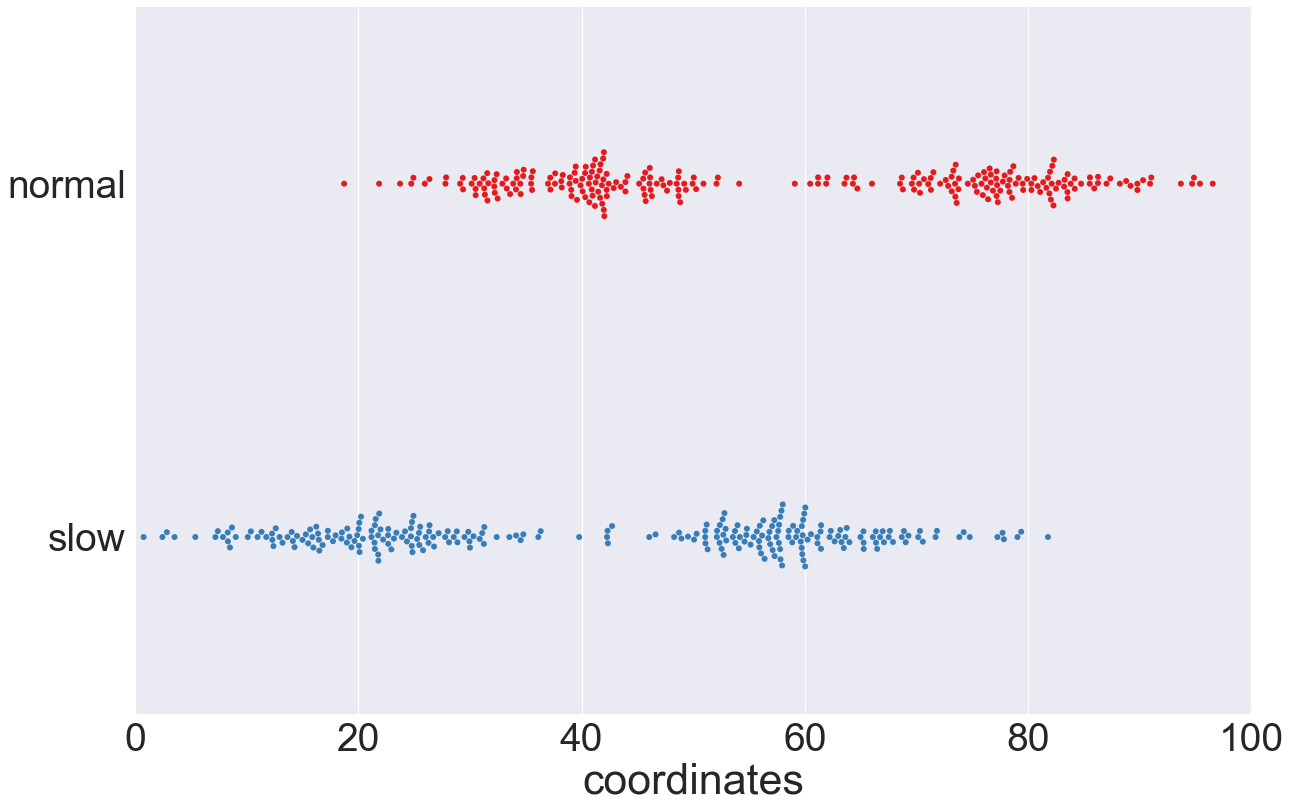

In [11]:
plot_sample(distribution1,500,size_point=6)

In [12]:
# data = sample(distribution1,5)
# sns.set_context("talk",font_scale=2)
# plt.figure(figsize=(15,7))
# #sns.set_style("whitegrid")
# #matplotlib.rcParams.update({'font.size': 42})
# #ax = sns.swarmplot(x='coordinates',y='traffic',data=data,size=20,palette="Set1")
# #ax = sns.lmplot(x='coordinates',y='traffic',hue='traffic',data=data,size=20,palette=dict(normal="#3498db", slow="#95a5a6"))
# ax = sns.swarmplot(x='coordinates',y='traffic',hue='traffic',data=data,size=20)
# #matplotlib.rcParams.update({'font.size': 42})
# ax.set_xlim(0,100)
# #plt.ylabel('')
# ax.set_ylabel('')
# ax.xaxis.set_label_coords(0.5, 1.1)
# #ax.axes().get_yaxis().set_visible(False)
# #ax.yaxis.set_visible(False)
# l=ax.get_ylabel()
# sns.despine(bottom=True,right=False)
# #plt.xlabel('okio',fontsize=50)

In [248]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras
my_init = keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None)
h1 = 2
model = Sequential()
model.add(Dense(h1, input_dim=1,name='layer1',bias_initializer=my_init))
model.add(Activation('relu',name='layer2'))
model.add(Dense(1,name='layer3',bias_initializer=my_init))
model.add(Activation('sigmoid',name='layer4'))

In [249]:
#model.summary()

model.get_weights()

[array([[-0.86616391,  0.87509263]], dtype=float32),
 array([ 0.39235294,  0.0903163 ], dtype=float32),
 array([[ 1.30960095],
        [-1.25314474]], dtype=float32),
 array([ 0.33763504], dtype=float32)]

In [250]:
from keras.models import Model
layer_name = 'layer3'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)

In [251]:
layer2 = Model(inputs=model.input,
                                 outputs=model.get_layer('layer2').output)

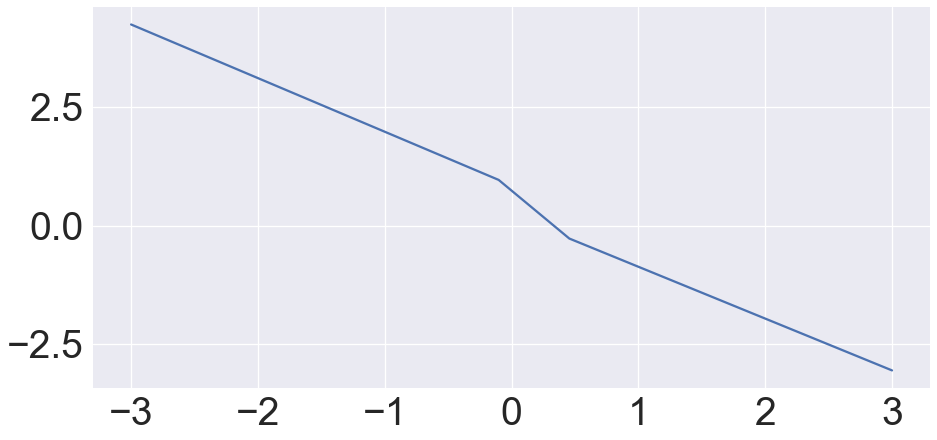

In [252]:
x = np.arange(-3,3,0.001)
y0 = intermediate_output = intermediate_layer_model.predict(x)
plt.figure(figsize=(15,7))
plt.plot(x,y0)

In [162]:
x = np.arange(-5,5,0.1);

In [163]:
y0 = intermediate_output = intermediate_layer_model.predict(x)
y1 = intermediate_output = layer2.predict(x)

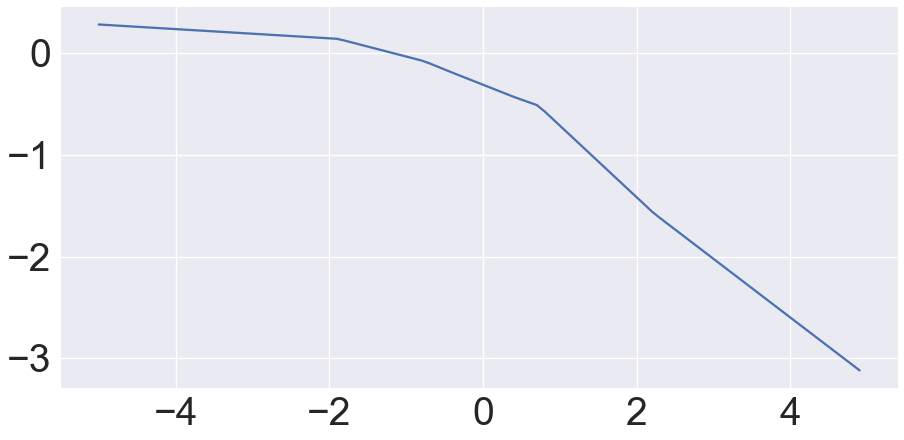

In [165]:
y1.shape

(100, 7)

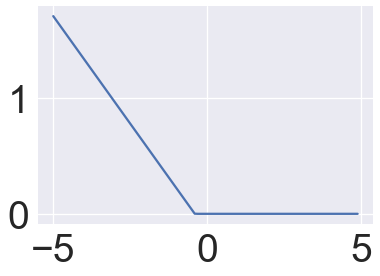

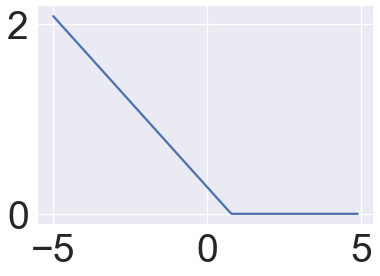

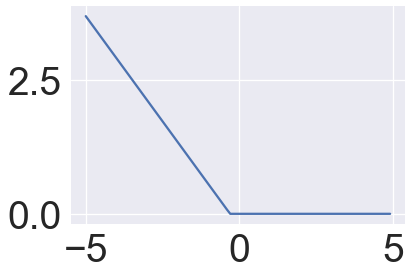

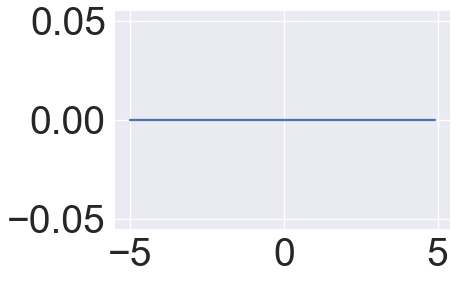

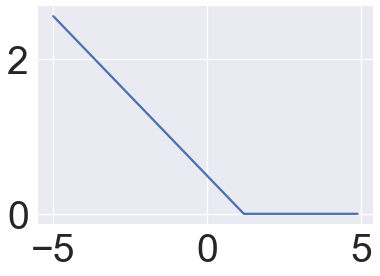

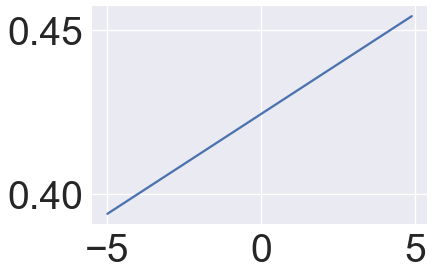

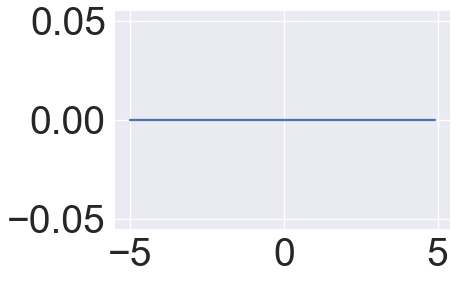

In [156]:
y1 = intermediate_output = layer2.predict(x)
for i in range(y1.shape[1]):
    plt.figure()
    y = y1[:,i] 
    plt.plot(x,y)

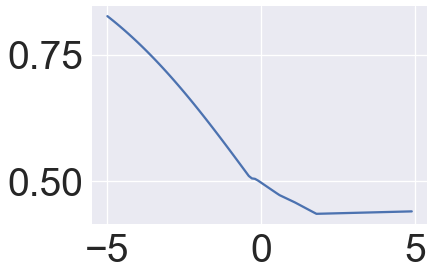

In [63]:
y2 = model.predict(x)
plt.plot(x,y2)

In [50]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [51]:
w = model.get_weights()

In [52]:
s = np.arange(-4,4,0.1)

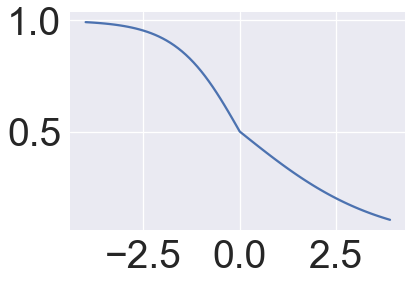

In [53]:
plt.plot(s,model.predict(s))

In [117]:
data = sample(distribution1,1000)

In [118]:
x = data.coordinates
y = data.traffic.map({'normal':0,'slow':1})

In [119]:
def proc(x):
    return (x-50)/50

In [120]:
x=proc(x)

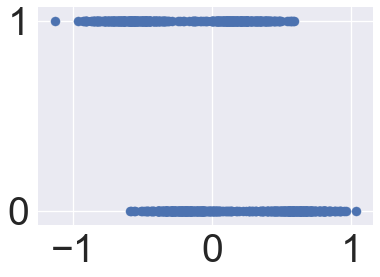

In [121]:
plt.scatter(x,y)

In [123]:
model.fit(x,y,epochs=200, batch_size=64)

Epoch 1/200
1000/1000 [==============================] - 0s 44us/step - loss: 0.4067 - acc: 0.8370
Epoch 2/200
1000/1000 [==============================] - 0s 38us/step - loss: 0.4059 - acc: 0.8370
Epoch 3/200
1000/1000 [==============================] - 0s 36us/step - loss: 0.4050 - acc: 0.8390
Epoch 4/200
1000/1000 [==============================] - 0s 36us/step - loss: 0.4040 - acc: 0.8370
Epoch 5/200
1000/1000 [==============================] - 0s 36us/step - loss: 0.4029 - acc: 0.8400
Epoch 6/200
1000/1000 [==============================] - 0s 40us/step - loss: 0.4025 - acc: 0.8400
Epoch 7/200
1000/1000 [==============================] - 0s 37us/step - loss: 0.4013 - acc: 0.8410
Epoch 8/200
1000/1000 [==============================] - 0s 37us/step - loss: 0.4010 - acc: 0.8400
Epoch 9/200
1000/1000 [==============================] - 0s 37us/step - loss: 0.3998 - acc: 0.8420
Epoch 10/200
1000/1000 [==============================] - 0s 35us/step - loss: 0.3989 - acc: 0.8410
Epoch 11/

In [124]:
def print_pred_model(model):
    x = np.linspace(0,100,num=1000)
    xp=proc(x)
    y = model.predict(xp)
    plt.figure()
    plt.plot(x,y)

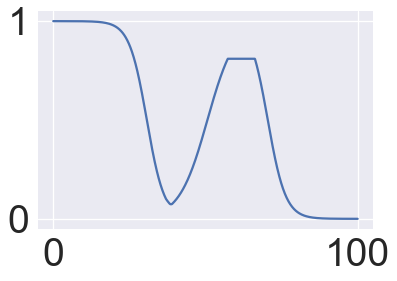

In [125]:
print_pred_model(model)